# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import neighbors
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Pre-Processing for modeling

In [2]:
#import datasets
train_dum_df = pd.read_csv('./Data/train_dum_df.csv', index_col=0)
test_dum_df = pd.read_csv('./Data/test_dum_df.csv', index_col=0)

train_undum_df = pd.read_csv('./Data/train_undum_df.csv', index_col=0)
test_undum_df = pd.read_csv('./Data/test_undum_df.csv', index_col=0)

In [3]:
#assign predictor and target variables
y = train_dum_df['SalePrice'].apply(np.log)
X = train_dum_df.drop(["SalePrice"], axis = 1)

In [4]:
#train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Machine Learning Modeling
###    Multiple Linear Regression

In [12]:
ols = LinearRegression()

ols.fit(X_train, y_train)
cv = np.mean(cross_val_score(ols, X_train, y_train, cv = 10))
pred = ols.predict(X_test)
RMSLE = (mean_squared_error(pred, y_test, squared = False))


print("R^2 train set: %f" %ols.score(X_train, y_train))
print("R^2 test  set: %f" %ols.score(X_test, y_test))
print("CV R^2 train set: " + str(round(cv,5)))
print("RMSLE: " + str(round(RMSLE, 5)))

R^2 train set: 0.910181
R^2 test  set: 0.882335
CV R^2 train set: 0.84205
RMSLE: 0.14128


In [13]:
print('negative slope column names %s' %(X_train.columns[ols.coef_<0]))
print('positive slope column names %s' %(X_train.columns[ols.coef_>0]))

negative slope column names Index(['MSSubClass_30', 'MSSubClass_45', 'MSSubClass_60', 'MSSubClass_80',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'LotShape_IR3', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Condition1_RRAe',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco',
       'Exterior1

Text(0, 0.5, 'Predicted Value')

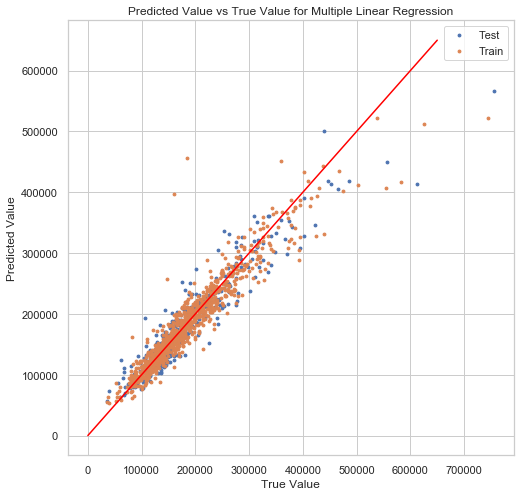

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(x = np.exp(y_test), y = np.exp(pred), s = 8, label = "Test")
plt.scatter(x = np.exp(y_train), y = np.exp(ols.predict(X_train)), s = 8, label = "Train")
plt.plot([0,650000],[0,650000], color = "red")
plt.legend(loc = 0)
plt.title("Predicted Value vs True Value for Multiple Linear Regression")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

In [8]:
# calculate VIF for each feature 
VIF = pd.DataFrame() 
VIF["Features"] = X_train.columns 
VIF["VIF"] = [round(variance_inflation_factor(X_train.values, i),3)
                          for i in range(len(X_train.columns))] 
  
VIF.sort_values(by='VIF', ascending=False)

/Users/marcuschoi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/marcuschoi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
121,GarageCond_None,inf
93,Exterior2nd_CBlock,inf
118,GarageType_NA,inf
12,MSSubClass_180,inf
10,MSSubClass_120,inf
9,MSSubClass_90,inf
11,MSSubClass_160,inf
61,BldgType_Duplex,inf
62,BldgType_Twnhs,inf
63,BldgType_TwnhsE,inf


In [9]:
#observe features with p-values less than 0.05 
features_add=sm.add_constant(X)
ols = sm.OLS(y, features_add).fit().summary2()
ols2 = ols.tables[1][ols.tables[1]['P>|t|'] < 0.05].round(4)[1:]

ols2.reindex(ols2["Coef."].abs().sort_values(ascending = False).index)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
MSZoning_RH,0.4867,0.0636,7.6523,0.0000,0.3619,0.6115
MSZoning_FV,0.4707,0.0643,7.3168,0.0000,0.3445,0.5969
MSZoning_RL,0.4423,0.0538,8.2269,0.0000,0.3368,0.5478
MSZoning_RM,0.4139,0.0502,8.2371,0.0000,0.3153,0.5125
Exterior1st_BrkComm,-0.3531,0.1460,-2.4183,0.0157,-0.6395,-0.0666
GarageType_NA,0.2164,0.0752,2.8771,0.0041,0.0688,0.3640
GarageCond_None,0.2164,0.0752,2.8771,0.0041,0.0688,0.3640
Neighborhood_StoneBr,0.1748,0.0446,3.9170,0.0001,0.0872,0.2623
GarageType_Basment,0.1681,0.0667,2.5202,0.0118,0.0372,0.2989
GarageType_Attchd,0.1530,0.0570,2.6847,0.0074,0.0412,0.2649
